### Create and load xCos model

In [13]:
!pwd

/Users/shreyasbhat/xcos/src


In [15]:
import torch
import numpy as np
from torchvision.utils import make_grid
from torchvision import transforms
from matplotlib import pyplot as plt
from PIL import Image

from mtcnn_pytorch.crop_and_aligned import mctnn_crop_face
from model.model import xCosModel
from utils.util import batch_visualize_xcos

img1 = '../datasets/faces/Aaron_Eckhart_0001.jpg'
img2 = '../datasets/faces/Aaron_Pena_0001_surgical.jpg'

model = xCosModel()
pretrained_path = '../pretrained_model/xcos/20200217_accu_9931_Arcface.pth'
checkpoint = torch.load(pretrained_path)
model.load_state_dict(checkpoint['state_dict'], strict=False)
model.eval()

xCosModel(
  (attention): XCosAttention(
    (embedding_net): Sequential(
      (0): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): PReLU(num_parameters=1)
    )
    (attention): Sequential(
      (0): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): PReLU(num_parameters=1)
      (3): Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): PReLU(num_parameters=1)
    )
  )
  (backbone): Backbone_FC2Conv(
    (input_layer): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): PReLU(num_parameters=

In [16]:
%matplotlib inline
def show(img):
    plt.figure(figsize=(14, 24))
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

In [17]:
transforms_mine = transforms.Compose([
        transforms.Resize([112, 112]),
        transforms.ToTensor(),
        transforms.Normalize([.5, .5, .5], [.5, .5, .5]),
    ])

dict_keys(['flatten_feats', 'grid_feats', 'x_coses', 'attention_maps', 'grid_cos_maps'])
>>>> visual.shape torch.Size([1, 3, 300, 1400])


<Figure size 432x288 with 0 Axes>

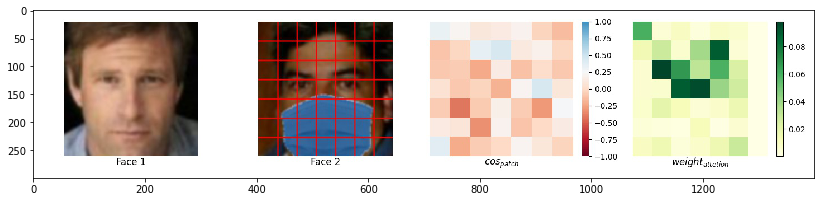

In [18]:
img1 = Image.open(img1).convert('RGB')
img2 = Image.open(img2).convert('RGB')
# In fact, BGR2RGB=True turn RGB into BGR
img1 = mctnn_crop_face(img1, BGR2RGB=False)
img2 = mctnn_crop_face(img2, BGR2RGB=False)
img1 = transforms_mine(img1)
img2 = transforms_mine(img2)
imgs_tensor = torch.stack([img1, img2])

data = {}
data['data_input'] = imgs_tensor.unsqueeze(1)
######
model_output = model(data, scenario="get_feature_and_xcos")
print(model_output.keys())
img1s, img2s = data['data_input']
img1s = img1s.cpu().numpy()
img2s = img2s.cpu().numpy()

grid_cos_maps = model_output['grid_cos_maps'].squeeze().detach().cpu().unsqueeze(0).numpy()
attention_maps = model_output['attention_maps'].squeeze().detach().cpu().unsqueeze(0).numpy()
visualizations = batch_visualize_xcos(img1s, img2s, grid_cos_maps, attention_maps)
print('>>>> visual.shape', visualizations[0].size())
show(make_grid(torch.cat(visualizations), padding=1, nrow=1))

    
